In [491]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [492]:
%matplotlib inline

In [547]:
#120km/hr is 2 km/min or 33.33 m/sec

class Car:
    
    def __init__(self):
        self.topspeed = 33 #meters/sec
        self.size = 5
        self.decel = -2 #meters/sec with 10% chance each sec
        self.accel = 2 #meters/sec if possible
        self.speed = 0
        self.location = 0
        self.cif_location = 0
        self.cif_speed = 0
            
    #def get_distance(self):
    #    if self.location > self.cif_location:
    #        self.distance = 1000 - self.location + self.cif_location - 5
    #    else:
    #        self.distance = self.cif_location - 5 - self.location
        
    #def get_next_location(self, passed_speed):
    #    return self.location + passed_speed
    
    def will_decelerate(self):
        if random.randint(1, 10) == 1:
            return True
        else:
            return False
        
    def decelerate(self):
        self.speed += self.decel
        if self.speed < 0:
            self.speed = 0
        self.location = (self.location + self.speed) % 1000
        
        
    def can_accelerate(self):
        if self.speed + self.accel <= self.topspeed:
            return True
        else:
            return False
        
    def accelerate(self):
        self.speed += self.accel
        self.location = (self.location + self.speed) % 1000
    
    def get_distance(self, loc):
        if loc >= 1000:
            distance = 1000 - loc + self.cif_location - 5
        else:
            distance = self.cif_location - 5 - loc
        return distance
    
    def move_car(self):
        cruise_location = self.location + self.speed
        cruise_distance = self.get_distance(cruise_location)
        if cruise_distance < 1:
            self.speed = self.cif_speed
            self.location = (self.location + self.speed) % 1000  
        else:
            if self.will_decelerate() == True:
                self.decelerate()
            elif self.can_accelerate() == True:
                accel_location = self.location + self.speed + self.accel
                accel_distance = self.get_distance(accel_location)
                if accel_distance < 1:
                    self.speed = self.cif_speed
                    self.location = (self.location + self.speed) % 1000
                else:
                    self.accelerate()
            else:
                self.location = cruise_location % 1000
    

In [548]:
class Traffic_Sim:
    
    def __init__(self, road_length=1000, num_cars=30, seconds=60):
        self.road_length = road_length
        self.num_cars = num_cars
        self.seconds = seconds
        self.cars = self.create_cars()
        self.car_start_locations = np.linspace(self.road_length - 30, 0, self.num_cars, dtype="int")
       
    def create_cars(self):
        cars = []
        for _ in range(self.num_cars):
            cars.append(Car())
        return cars
    
    def place_cars(self):
        for index, value in enumerate(self.cars):
            value.location = self.car_start_locations[index]
            
    def pass_car_to_car_behind(self):
        for index, value in enumerate(self.cars):
            if index == 0:
                value.cif_location = self.cars[self.num_cars - 1].location
                value.cif_speed = self.cars[self.num_cars - 1].speed
            else:
                value.cif_location = self.cars[index - 1].location
                value.cif_speed = self.cars[index - 1].speed
    
    def move_cars(self):
        for index, value in enumerate(self.cars):
            value.move_car()
            self.pass_car_to_car_behind()
        
    def run_traffic_sim(self):
        self.place_cars()
        self.pass_car_to_car_behind()
        results = [[car.location for car in self.cars]]
        for sec in range(self.seconds):
            self.move_cars()
            new_car_locations = [car.location for car in self.cars]
            results.append(new_car_locations)
        return results
    
    

In [549]:
traffic_sim_one = Traffic_Sim()

In [550]:
ts_one_results = traffic_sim_one.run_traffic_sim()

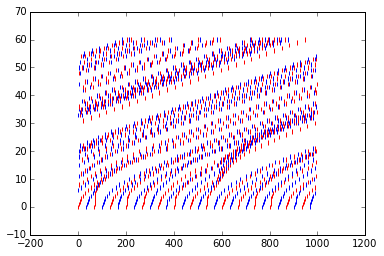

In [551]:
time = [[x] * 30 for x in range(61)]
colors = ['blue', 'red']
plt.scatter(ts_one_results, time, c=colors, marker="|")
